## <font color="broun">Libraries and functions</font>

### `import necessary libraries`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import svm 
from sklearn import metrics
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from sklearn.datasets import make_classification, make_circles
import seaborn as sns

### `get the features and label from the dataset`

In [2]:
def load_traing_testing_sets(trainSet,testSet):
    "it take the names of training and testing sets and retrurn X_train , X_test , y_train ,y_test"
    training_dataset = pd.read_csv(trainSet)
    print(type(training_dataset))
    testing_dataset = pd.read_csv(testSet)

    X_train = training_dataset.iloc[:,:5]
    X_test =  testing_dataset.iloc[:,:5]
    y_train = training_dataset.iloc[:,5]
    y_test = testing_dataset.iloc[:,5]

    return  X_train,y_train,X_test,y_test

### `accuracy evaluation`

In [3]:
def getAccuracy(model, X_test, y_test):
    return model.score(X_test,y_test)*100

### `get confusion matrix`

In [4]:
def getConfusionMatrix(model,X_test,y_test):
    predictions = model.predict(X_test)
    cm = confusion_matrix(y_test, predictions, labels=model.classes_)
    print(cm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=model.classes_)
    disp.plot()
    plt.show()

### `plot decision boundery`

In [5]:
def plotRegions(model, X):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    XX, YY = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

    z = model.predict(np.c_[XX.ravel(), YY.ravel()])
    ZZ = z.reshape(XX.shape)
    plt.contourf(XX, YY, ZZ, alpha=0.2)

### `ploting the data`

In [6]:
def plotData(features, labels, cls, class_names):
    colors = ['r', 'b', 'g','y','']
    markers = ['o', '*', '+','x']
    for class_index in range(len(cls)):
        plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
    Title = "Dataset with {n} classes".format(n=int(len(cls)))
    plt.title(Title)
#     plt.xlabel('Petal Length (cm)')
#     plt.ylabel('Petal width (cm)')
    plt.legend()

In [7]:
def plotDataOVO(features, labels, cls, class_names):
    colors = ['r', 'b','']
    markers = ['o', 'x']
    for class_index in range(len(cls)):
        plt.scatter(features[labels == cls[class_index],0], features[labels == cls[class_index],1], c=colors[class_index], marker=markers[class_index], label=class_names[cls[class_index]])
    Title = "Dataset with {n} classes".format(n=int(len(cls)))
    plt.title(Title)
#     plt.xlabel('Petal Length (cm)')
#     plt.ylabel('Petal width (cm)')
    plt.legend()

### `Get Class Names`


In [8]:
def getClassNames(target_names):
    cls_all = {}
    for i, label in enumerate(target_names):
        cls_all[i] = label
    return cls_all

In [9]:
def plotDataAndBoundries(X,y,Cls,classNames,model):
    plotData(X, y,Cls,classNames)
    plotRegions(model,X)
    plt.legend(loc="upper left")
    plt.show()

In [10]:
def plotDataAndBoundriesOVO(X,y,Cls,classNames,model):
    plotDataOVO(X, y,Cls,classNames)
    plotRegions(model,X)
    plt.legend(loc="upper left")
    plt.show()

In [11]:
#Prepare dataset for OVO Classifier
def prepareDataset(X, y, cls_remove=None):
    cls = [0, 1, 2, 3]
    if cls_remove is not None:
        labels = []
        features = []
        for index, (feat, label) in enumerate(zip(X, y)):
            if y[index] not in cls_remove:
                features.append(feat) 
                labels.append(label)
        cls.remove(cls_remove[0])
        cls.remove(cls_remove[1])
    else:
        features = X
        labels = y
    return np.array(features),np.array(labels), cls


 

--------------------------------------------------------------------------------------------------------------------------------

## `problem 1`

### <font color="broun">1.1 Load the DUMD dataset and convert categorical class labels to numerical values by using the LabelEncoder</font>

In [12]:
#'DUMD_train.csv'
link_train = "https://drive.google.com/uc?id=1pbnWqF-Mo61q2Kpp1CF_rV-58_9mmOVs"
# 'DUMD_test.csv'
link_test = "https://drive.google.com/uc?id=1JAut9ED1IKO95w1LKvCCOxMuERKqoKCW"
X_train,y_train,X_test,y_test=load_traing_testing_sets('DUMD_train.csv','DUMD_test.csv')

<class 'pandas.core.frame.DataFrame'>


In [13]:
X_train

,STG,SCG,STR,LPR,PEG
0,0.00,0.00,0.00,0.00,0.00
1,0.08,0.08,0.10,0.24,0.90
2,0.10,0.10,0.15,0.65,0.30
3,0.08,0.08,0.08,0.98,0.24
4,0.09,0.15,0.40,0.10,0.66
...,...,...,...,...,...
318,0.90,0.78,0.62,0.32,0.89
319,0.85,0.82,0.66,0.83,0.83
320,0.56,0.60,0.77,0.13,0.32
321,0.66,0.68,0.81,0.57,0.57


### `encoding the categorical data`

In [14]:
from sklearn.preprocessing import LabelEncoder
labelencoder_y = LabelEncoder()


# to display the target values before encoding 
new_df = pd.DataFrame(y_train)
Unique_values_of_UNS=new_df.drop_duplicates()
print(Unique_values_of_UNS)

y_train = labelencoder_y.fit_transform(y_train)
y_test = labelencoder_y.fit_transform(y_test)
 
# to display the target values after encoding 
new_df = pd.DataFrame(y_train)
Unique_values_of_UNS=new_df.drop_duplicates()
print(Unique_values_of_UNS)

        UNS
0  Very Low
1      High
2    Medium
3       Low
   0
0  3
1  0
2  2
3  1


### <font color="broun">1.2 Choose two features from DUMD dataset to apply SVM and Perceptron algorithms for classification</font>

### `feature selection`

### `show features impoertance (features -> target)`

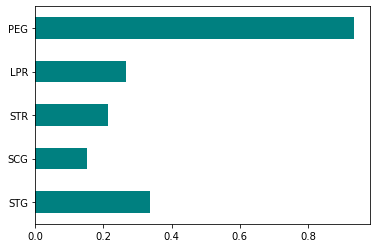

In [15]:
from sklearn.feature_selection import mutual_info_classif

importances = mutual_info_classif(X_train,y_train)
feat_importances = pd.Series(importances, X_train.columns[0:len(X_train.columns)])
feat_importances.plot(kind ='barh', color = 'teal')
plt.show()

-------------------------------------------------------------------------------------------------------------------------------

### <font color="green">Correlation between features</font>

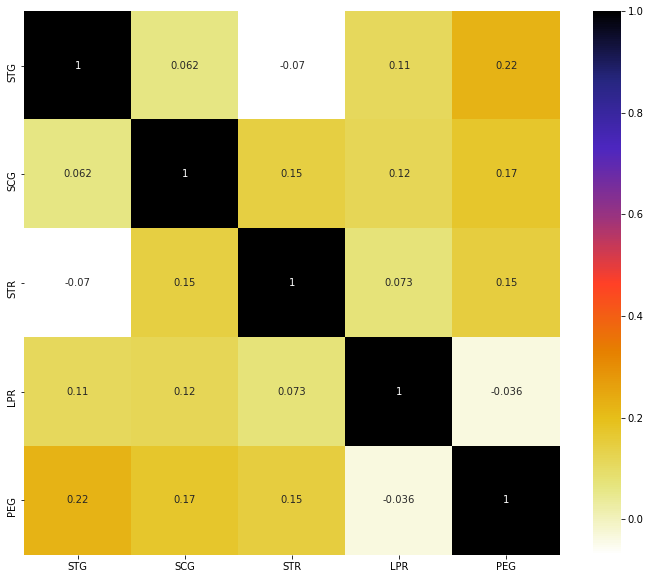

3
{'PEG', 'LPR', 'STR'}


In [16]:
# here the code of feature selection

correlation_matrix = X_train.corr()
# print('correlation_matrix',correlation_matrix) 

#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()


# with the following function we can select highly correlated features
# it will remove the first feature that is correlated with anything other feature

def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

corr_features = correlation(X_train, 0.1)
print(len(set(corr_features)))
print(corr_features)


-------------------------------------------------------------------------------------------------------------------------

In [17]:
# the features that will be droped deppending on evaluationg the importance and the correlations will be : 
{'SCG', 'STR', 'LPR'}

dropedFeatures ={'SCG', 'STR', 'LPR'}

#drop low correlation features from X_train and X_test
X_train.drop(dropedFeatures,axis=1,inplace=True)
X_test.drop(dropedFeatures,axis=1,inplace=True)
y_train_ovo=y_train
y_test_ovo=y_test

`feture selection explination` :  
1- we took the correlation between the independant features and selected the most two correlated features and the result was 
{PEG, STG}.

2- we took the correlation between the independant features and the dependant one and selected the most two correlated features and the result was  {SCG, STG}.

### <font color="broun">1.3 Classify testing data by using SVM and Perceptron classifiers. Provide accuracies, confusion matrix and decision boundaries for both classifier.</font>

### `SVM OVO`

In [18]:
model_OVO = svm.SVC(kernel='rbf', decision_function_shape='ovo', C=200)
model_OVO.fit(X_train, y_train)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(model_OVO, X_test,y_test))) 

Accuracy of model: 80.00%


[[17  0  4  0]
 [ 0 23  0  3]
 [ 0  5 17  0]
 [ 0  4  0  7]]


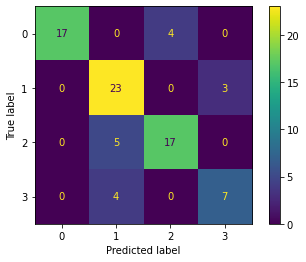

In [19]:
getConfusionMatrix(model_OVO,X_test,y_test)

Training


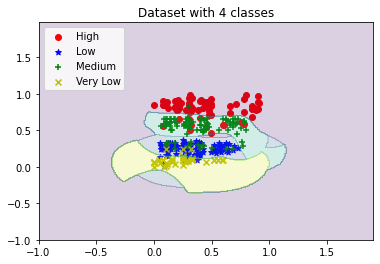

Testing


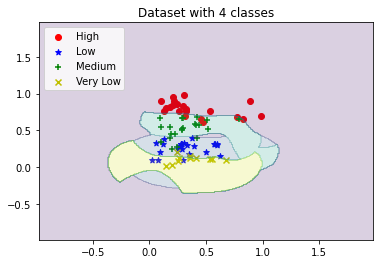

In [20]:
print("Training")
plotDataAndBoundries(X_train.values,y_train,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},model_OVO)

print("Testing")
plotDataAndBoundries(X_test.values,y_test,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},model_OVO)

### `SVM OVR`

In [21]:
model = svm.SVC(kernel='rbf', decision_function_shape='ovr', C=200)
model.fit(X_train, y_train)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(model, X_test,y_test))) 

Accuracy of model: 80.00%


[[17  0  4  0]
 [ 0 23  0  3]
 [ 0  5 17  0]
 [ 0  4  0  7]]


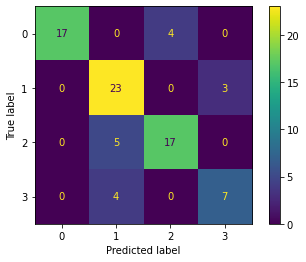

In [22]:
getConfusionMatrix(model,X_test,y_test)

Training


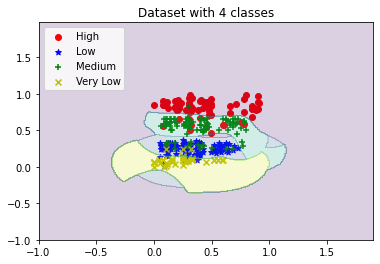

Testing


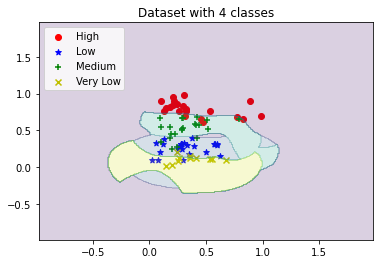

In [23]:
print("Training")
plotDataAndBoundries(X_train.values,y_train,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},model)

print("Testing")
plotDataAndBoundries(X_test.values,y_test,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},model)

### `perceptron`

In [24]:
from sklearn.linear_model import Perceptron
clf = Perceptron(tol=1e-3, random_state=0)
clf.fit(X_train, y_train)
print('Accuracy of model: {:.2f}%'.format(getAccuracy(clf, X_test,y_test))) 

Accuracy of model: 60.00%


[[17  1  3  0]
 [ 0 26  0  0]
 [ 1 16  5  0]
 [ 0 11  0  0]]


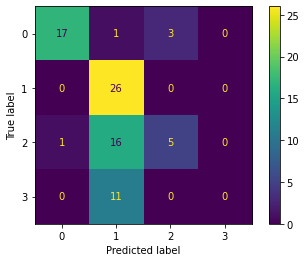

In [25]:
getConfusionMatrix(clf,X_test,y_test)

Training


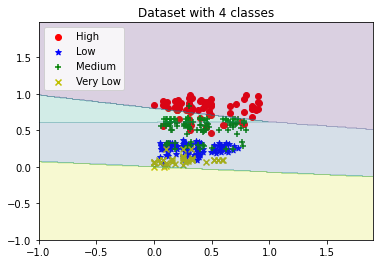

Testing


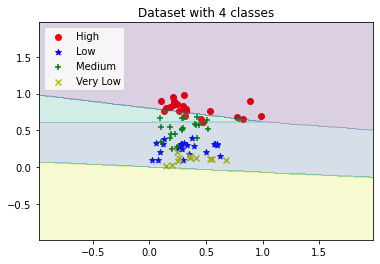

In [26]:
print("Training")
plotDataAndBoundries(X_train.values,y_train,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},clf)

print("Testing")
plotDataAndBoundries(X_test.values,y_test,[0,1,2,3],{0:'High',1:'Low',2:'Medium',3:'Very Low'},clf)

----------------------------------------------------------------------------------------------------------------------------------

## `problem 2`

### `Build OvR-SVM, test on DUMD testing dataset with obtained features from Problem 1.`

### <font color="broun">2.1.1 Obtain the binarized labels (OvR)</font>

In [27]:
from sklearn.preprocessing import MultiLabelBinarizer

In [28]:
y_train_before_binarizing = y_train.copy()
y_test_before_binarizing = y_test.copy()
mlb = MultiLabelBinarizer()
y_train = mlb.fit_transform(y_train.reshape((-1,1)))
y_test = mlb.fit_transform(y_test.reshape((-1,1)))
  


# print(f"y_train after encoding : {y_train}")
# print(f"y_test after encoding : {y_test}")

In [29]:
# High 0
# Low 1 
# Medium 2
# Very Low  3
 



In [30]:
# for training 
y1 = y_train[:,0]
y2 = y_train[:,1]
y3 = y_train[:,2]
y4 = y_train[:,3]

# for testing 
yT1 = y_test[:,0]
yT2 = y_test[:,1]
yT3 = y_test[:,2]
yT4 = y_test[:,3]

### <font color="broun">2.1.2 Obtain the SVM’s accuracy</font>

### <font color="broun">2.1.3 Plot SVM’s decision boundary</font>

### <font color="broun">2.1.4 Make comments on model’s performance on each binary classification problem.</font>

In [31]:
def handMadeOVA(features,Label,x_test,y_test):
    "it returns the probability of the class"
    oVoClf = svm.SVC(kernel='rbf', probability=True)
    oVoClf.fit(features, Label)
    print('Accuracy of the classifier is : {:.2f}%'.format(getAccuracy(oVoClf, x_test,y_test)))
    getConfusionMatrix(oVoClf,x_test,y_test)
    y_pred = oVoClf.predict_proba(x_test)[:,1].reshape(-1,1)
    
    return y_pred ,oVoClf 

Accuracy of the classifier is : 93.75%
[[59  0]
 [ 5 16]]


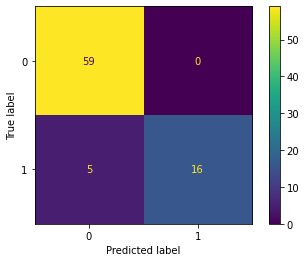

In [32]:
# 1st classifier 
y1_pred , handMadeModel1 =handMadeOVA(X_train,y1,X_test,yT1) 

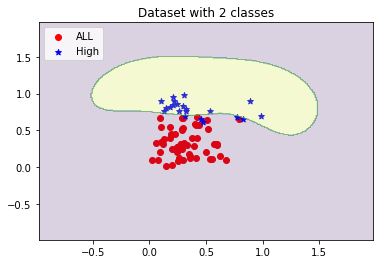

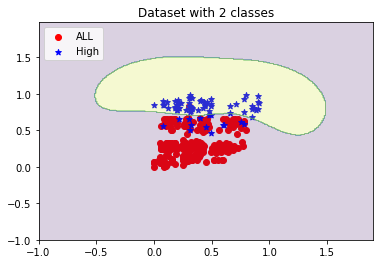

In [33]:
plotDataAndBoundries(X_test.values,yT1,[0,1],{0:'ALL', 1:'High'},handMadeModel1)
plotDataAndBoundries(X_train.values,y1,[0,1],{0:'ALL', 1:'High'},handMadeModel1)


Accuracy of the classifier is : 87.50%
[[47  7]
 [ 3 23]]


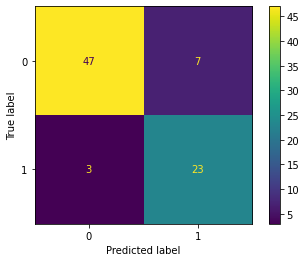

In [34]:
# 2nd classifier 
y2_pred, handMadeModel2 =handMadeOVA(X_train,y2,X_test,yT2) 

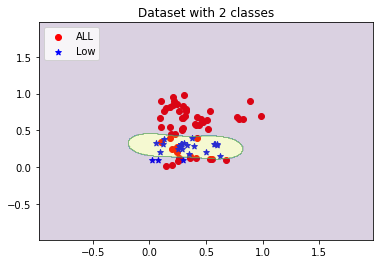

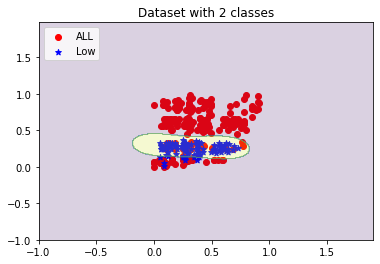

In [35]:
 
plotDataAndBoundries(X_test.values,yT2,[0,1],{0:'ALL', 1:'Low'},handMadeModel2)
plotDataAndBoundries(X_train.values,y2,[0,1],{0:'ALL', 1:'Low'},handMadeModel2)



Accuracy of the classifier is : 87.50%
[[53  5]
 [ 5 17]]


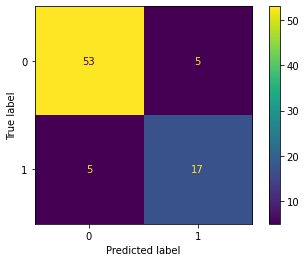

In [36]:
# 3rd classifier 
y3_pred, handMadeModel3 =handMadeOVA(X_train,y3,X_test,yT3)

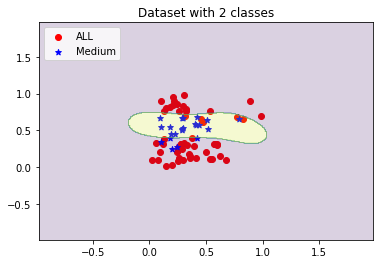

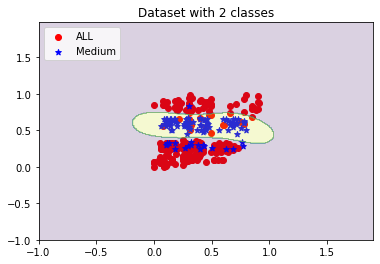

In [37]:
 
plotDataAndBoundries(X_test.values,yT3,[0,1],{0:'ALL', 1:'Medium'},handMadeModel3)
plotDataAndBoundries(X_train.values,y3,[0,1],{0:'ALL', 1:'Medium'},handMadeModel3)


Accuracy of the classifier is : 93.75%
[[66  3]
 [ 2  9]]


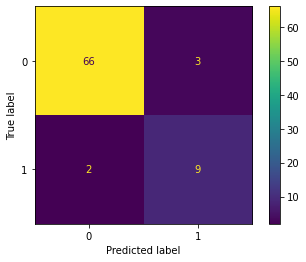

In [38]:
# 4th classifier 
y4_pred, handMadeModel4 =handMadeOVA(X_train,y4,X_test,yT4) 

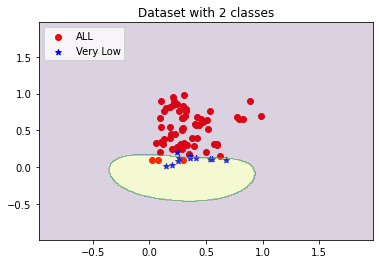

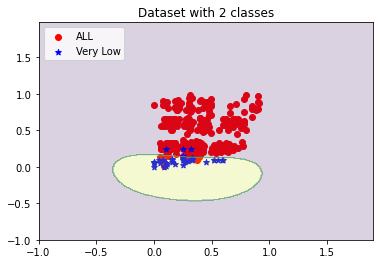

In [39]:
 
plotDataAndBoundries(X_test.values,yT4,[0,1],{0:'ALL', 1:'Very Low'},handMadeModel4)
plotDataAndBoundries(X_train.values,y4,[0,1],{0:'ALL', 1:'Very Low'},handMadeModel4)


In [40]:
y_all = np.hstack((y1_pred, y2_pred, y3_pred,y4_pred))
y_all.shape

(80, 4)

--------------------------------------------------------------------------------------------------------------------------------

### <font color="broun"> 2.2 Use argmax to aggregate confidence scores and obtain the final predicted labels and obtain the performance (i.e., confusion matrix, accuracy, plotting correct and wrong prediction points) of OvR-SVM</font>

In [41]:
m = mlb.classes_[np.argmax(y_all, axis=1)]
m.reshape((-1,1))

array([[2],
       [1],
       [2],
       [3],
       [0],
       [2],
       [2],
       [0],
       [1],
       [2],
       [2],
       [1],
       [0],
       [3],
       [0],
       [1],
       [1],
       [2],
       [1],
       [2],
       [1],
       [1],
       [2],
       [2],
       [2],
       [1],
       [2],
       [0],
       [1],
       [0],
       [0],
       [2],
       [2],
       [2],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [1],
       [0],
       [2],
       [2],
       [1],
       [0],
       [3],
       [0],
       [3],
       [1],
       [2],
       [0],
       [1],
       [0],
       [1],
       [3],
       [1],
       [1],
       [1],
       [0],
       [0],
       [1],
       [3],
       [2],
       [1],
       [3],
       [3],
       [1],
       [2],
       [1],
       [1],
       [1],
       [3],
       [2],
       [2],
       [2],
       [1],
       [3],
       [0],
       [3]], dtype=object)

In [42]:
# metrics.accuracy_score(y_test_before_binarizing,m) # get true suggestion per total fact and suggestion 
#cm = confusion_matrix(y_test_before_binarizing, m)

---------------------------------------------------------------------------------------------------------------------------------

## `problem 3`

### `Build OvO-SVM, test on DUMD testing dataset with obtained features from Problem 1.`

In [43]:
from sklearn.preprocessing import MultiLabelBinarizer

In [44]:
# High 0
# Low 1 
# Medium 2
# Very Low  3




In [45]:
# # for training 
# y12 = y_train[:,:2]       #first vs second
# y13 = y_train[:,[0,2]]    #first vs third
# y14= y_train[:,[0,3]]    #first vs fourth
 
# y23 = y_train[:,1:2]      #second vs third
# y24 = y_train[:,[1,3]]    #second vs fourth

# y34 = y_train[:,2:4]      #third vs fourth
 

# # for testing 
# yT12 = y_test[:,:2]       #first vs second
# yT13 = y_test[:,[0,2]]    #first vs third
# yT14= y_test[:,[0,3]]    #first vs fourth
 
# yT23 = y_test[:,1:2]      #second vs third
# yT24 = y_test[:,[1,3]]    #second vs fourth

# yT34 = y_test[:,2:4]      #third vs fourth


### <font color="broun">2.1.2 Obtain the SVM’s accuracy</font>

### <font color="broun">2.1.3 Plot SVM’s decision boundary</font>

### <font color="broun">2.1.4 Make comments on model’s performance on each binary classification problem.</font>

In [46]:
def handMadeOVO(features,Label,x_test,y_test):
    "it returns the probability of the class"
    oVoClf = svm.SVC(kernel='rbf', decision_function_shape='ovo',probability=True)
    oVoClf.fit(features, Label)
    print('Accuracy of the classifier is : {:.2f}%'.format(getAccuracy(oVoClf, x_test,y_test)))
    getConfusionMatrix(oVoClf,x_test,y_test)
    y_pred = oVoClf.predict_proba(features)[:,1].reshape(-1,1)
    return y_pred ,oVoClf 

In [47]:
#prepare test and train data for 1st classifier first class (High) vs second class (Low)
xtrain,ytrain, cls_newtrian = prepareDataset( X_train.to_numpy(),y_train_ovo, cls_remove=[2,3])
xtest,ytest, cls_newtest = prepareDataset( X_test.to_numpy(),y_test_ovo, cls_remove=[2,3])

Accuracy of the classifier is : 100.00%
[[21  0]
 [ 0 26]]


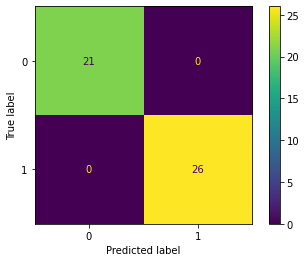

In [48]:
# 1st classifier first class (High) vs second class (Low)  
ypred1 ,handMadeModelOVO1=handMadeOVO(xtrain,ytrain,xtest,ytest) 

Training


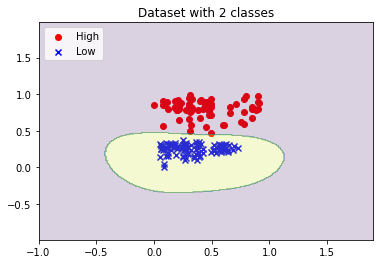

Testing


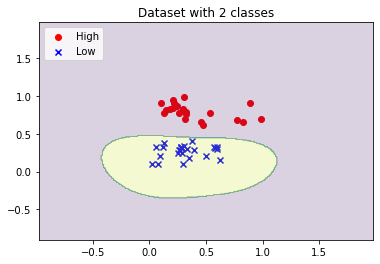

In [49]:
#plot data and boundries for 1st classifier first class (High) vs second class (Low)  
print('Training')
plotDataAndBoundriesOVO(xtrain,ytrain,[0,1],{0:'High', 1:'Low'},handMadeModelOVO1)
print('Testing')
plotDataAndBoundriesOVO(xtest,ytest,[0,1],{0:'High', 1:'Low'},handMadeModelOVO1)


In [50]:
#prepare test and train data for 2nd classifier first class (High) vs third class (Medium)
xtrain,ytrain, cls_newtrian = prepareDataset( X_train.to_numpy(),y_train_ovo, cls_remove=[1,3])
xtest,ytest, cls_newtest = prepareDataset( X_test.to_numpy(),y_test_ovo, cls_remove=[1,3])

Accuracy of the classifier is : 88.37%
[[16  5]
 [ 0 22]]


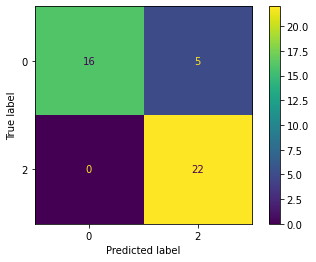

In [51]:
# 2nd classifier first class (High) vs third class (Medium)  
ypred2 ,handMadeModelOVO2=handMadeOVO(xtrain,ytrain,xtest,ytest) 

Training


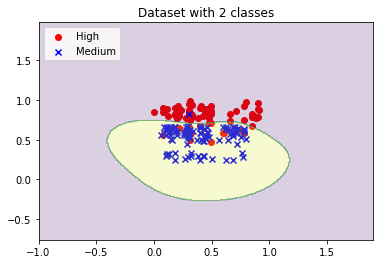

Testing


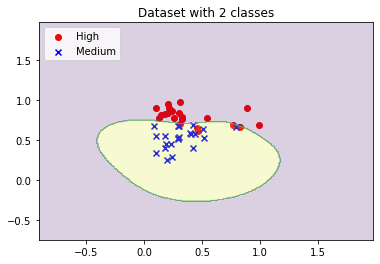

In [52]:
#plot data and boundries for 2nd classifier first class (High) vs third class (Medium)
print('Training')
plotDataAndBoundriesOVO(xtrain,ytrain,[0,2],{0:'High', 2:'Medium'},handMadeModelOVO2)
print('Testing')
plotDataAndBoundriesOVO(xtest,ytest,[0,2],{0:'High', 2:'Medium'},handMadeModelOVO2)


In [53]:
#prepare test and train data for 3rd classifier first class (High) vs fourth class (Very Low)
xtrain,ytrain, cls_newtrian = prepareDataset( X_train.to_numpy(),y_train_ovo, cls_remove=[1,2])
xtest,ytest, cls_newtest = prepareDataset( X_test.to_numpy(),y_test_ovo, cls_remove=[1,2])

Accuracy of the classifier is : 100.00%
[[21  0]
 [ 0 11]]


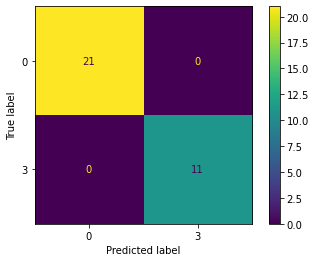

In [54]:
# 3rd classifier first class (High) vs fourth class (Very Low)
ypred3 ,handMadeModelOVO3=handMadeOVO(xtrain,ytrain,xtest,ytest) 

Training


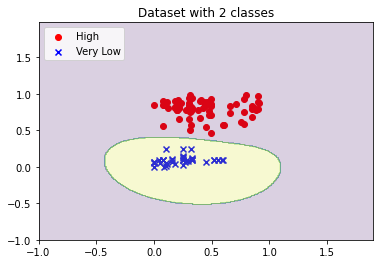

Testing


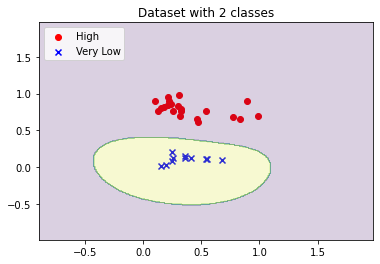

In [55]:
#plot data and boundries for 3rd classifier first class (High) vs fourth class (Very Low)  
print('Training')
plotDataAndBoundriesOVO(xtrain,ytrain,[0,3],{0:'High', 3:'Very Low'},handMadeModelOVO3)
print('Testing')
plotDataAndBoundriesOVO(xtest,ytest,[0,3],{0:'High', 3:'Very Low'},handMadeModelOVO3)


In [56]:
#prepare test and train data for 4th classifier second class (Low) vs third class (Medium)
xtrain,ytrain, cls_newtrian = prepareDataset( X_train.to_numpy(),y_train_ovo, cls_remove=[0,3])
xtest,ytest, cls_newtest = prepareDataset( X_test.to_numpy(),y_test_ovo, cls_remove=[0,3])

Accuracy of the classifier is : 89.58%
[[26  0]
 [ 5 17]]


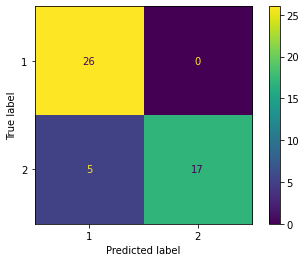

In [57]:
# 4th classifier second class (Low) vs third class (Medium) 
ypred4 ,handMadeModelOVO4=handMadeOVO(xtrain,ytrain,xtest,ytest) 

Training


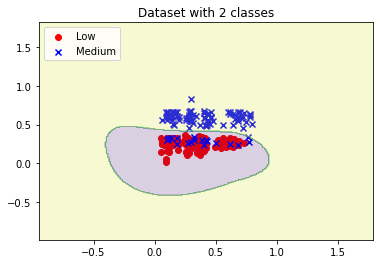

Testing


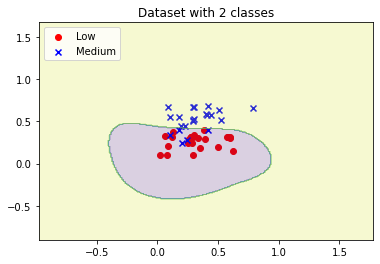

In [58]:
#plot data and boundries for 4th classifier second class (Low) vs third class (Medium)
print('Training')
plotDataAndBoundriesOVO(xtrain,ytrain,[1,2],{1:'Low', 2:'Medium'},handMadeModelOVO4)
print('Testing')
plotDataAndBoundriesOVO(xtest,ytest,[1,2],{1:'Low', 2:'Medium'},handMadeModelOVO4)


In [59]:
#prepare test and train data for 5th classifier second class (Low) vs fourth class (Very Low)
xtrain,ytrain, cls_newtrian = prepareDataset( X_train.to_numpy(),y_train_ovo, cls_remove=[0,2])
xtest,ytest, cls_newtest = prepareDataset( X_test.to_numpy(),y_test_ovo, cls_remove=[0,2])

Accuracy of the classifier is : 81.08%
[[22  4]
 [ 3  8]]


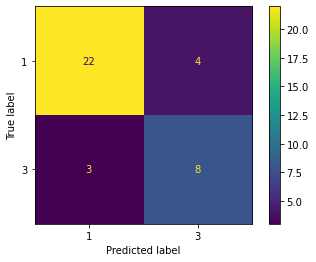

In [60]:
# 5th classifier second class (Low) vs fourth class (Very Low)
ypred5 ,handMadeModelOVO5=handMadeOVO(xtrain,ytrain,xtest,ytest) 

Training


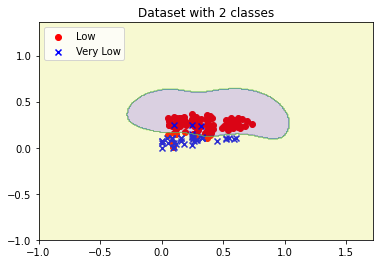

Testing


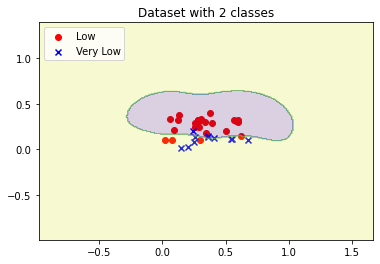

In [61]:
#plot data and boundries for 5th classifier second class (Low) vs fourth class (Very Low)  
print('Training')
plotDataAndBoundriesOVO(xtrain,ytrain,[1,3],{1:'Low', 3:'Very Low'},handMadeModelOVO5)
print('Testing')
plotDataAndBoundriesOVO(xtest,ytest,[1,3],{1:'Low', 3:'Very Low'},handMadeModelOVO5)


In [62]:
#prepare test and train data for 6th classifier third class (Medium) vs fourth class (Very Low)
xtrain,ytrain, cls_newtrian = prepareDataset( X_train.to_numpy(),y_train_ovo, cls_remove=[0,1])
xtest,ytest, cls_newtest = prepareDataset( X_test.to_numpy(),y_test_ovo, cls_remove=[0,1])

Accuracy of the classifier is : 100.00%
[[22  0]
 [ 0 11]]


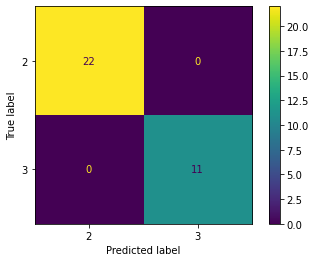

In [63]:
# 6th classifier third class (Medium) vs fourth class (Very Low)
ypred6 ,handMadeModelOVO6=handMadeOVO(xtrain,ytrain,xtest,ytest) 

Training


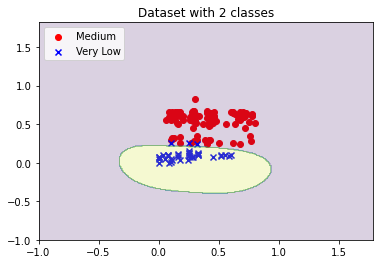

Testing


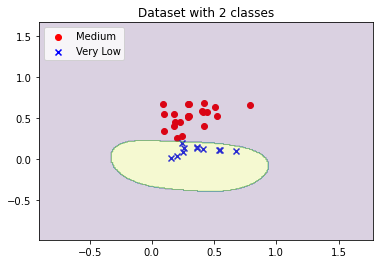

In [64]:
#plot data and boundries for 6th classifier third class (Medium) vs fourth class (Very Low)
print('Training')
plotDataAndBoundriesOVO(xtrain,ytrain,[2,3],{2:'Medium', 3:'Very Low'},handMadeModelOVO6)
print('Testing')
plotDataAndBoundriesOVO(xtest,ytest,[2,3],{2:'Medium', 3:'Very Low'},handMadeModelOVO6)


------------------------------------------------------------------------------------------------------------------------------------

# `Conclusion`

## `References`

1. Lecture notes 
2. Lab Notes 
3. 